In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import torchvision.transforms as T
from glob import glob
from natsort import natsorted
import os
from tqdm import tqdm

## Mask Generation using SAM: IP102 dataset

In [4]:
from foreground_mask_generation import SAM_MaskGenerator

In [5]:
ip102_images_dir =  "/bucket/siddhi/pestvision_data/foreground_data/Detection_IP102/JPEGImages"
ip102_annotations_dir = "/bucket/siddhi/pestvision_data/foreground_data/Detection_IP102/Annotations"

100%|██████████| 5/5 [00:04<00:00,  1.09it/s]


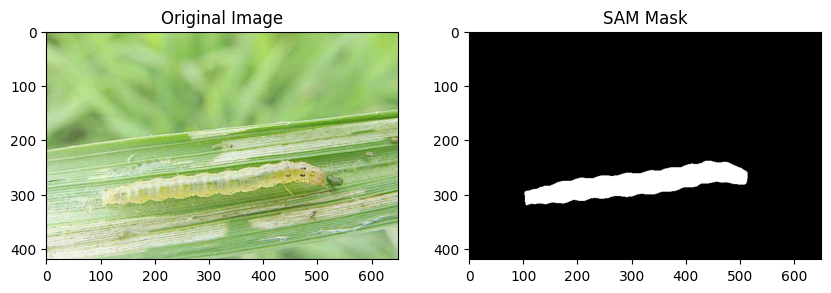

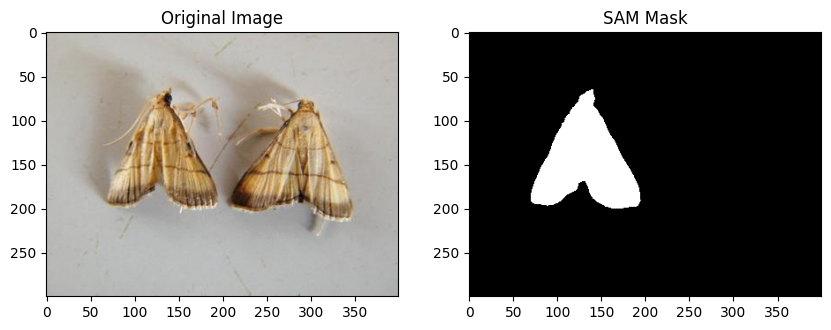

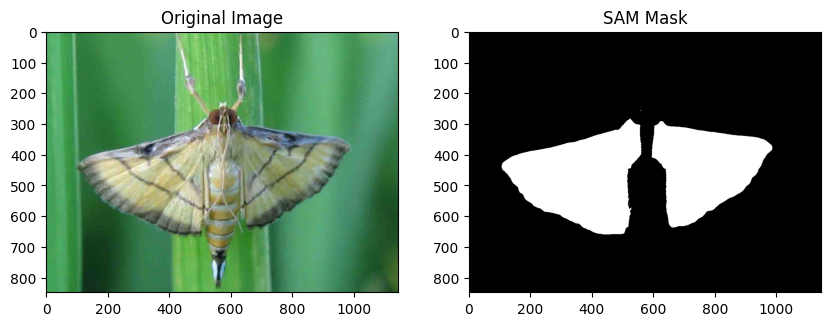

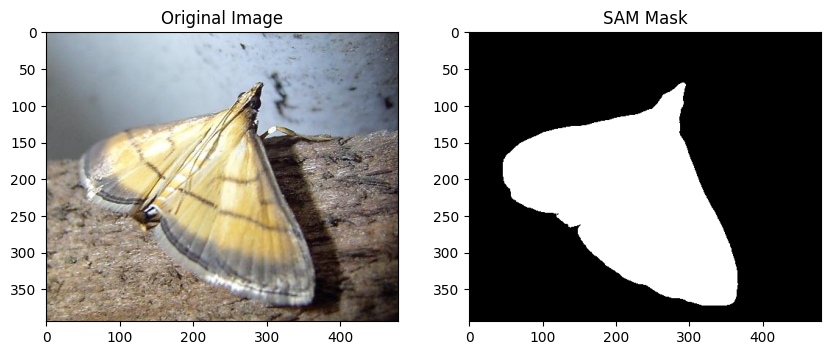

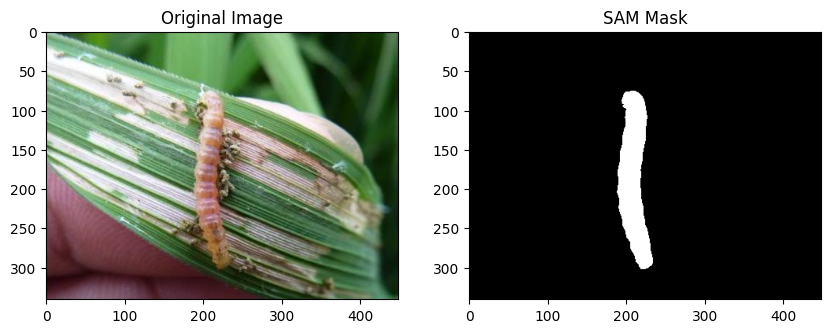

In [6]:
# visualizing the SAM generated masks for 5 sample images from the IP102 dataset

image_files = natsorted(glob(os.path.join(ip102_images_dir, "*.jpg")))[:5]
annotation_files = natsorted(glob(os.path.join(ip102_annotations_dir, "*.xml")))[:5]

assert len(image_files) == len(annotation_files), "AssertionError: len(image_files) == len(annotation_files) should be True"

sam_mask_generator = SAM_MaskGenerator(model_type="vit_h", checkpoint_path="weights/sam_vit_h_4b8939.pth", device="cuda")

for img, ann in tqdm(zip(image_files, annotation_files), total=len(image_files)):

    mask = sam_mask_generator.generate_mask(img, ann)

    # display the mask and the image
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    image = Image.open(img).convert('RGB')

    axes[0].imshow(image)
    axes[0].set_title('Original Image')

    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('SAM Mask')
    

In [7]:
# saving the SAM generated masks for all images in the IP102 dataset

ip102_images_dir =  "/bucket/siddhi/pestvision_data/foreground_data/Detection_IP102/JPEGImages"
ip102_annotations_dir = "/bucket/siddhi/pestvision_data/foreground_data/Detection_IP102/Annotations"
ip102_masks_dir = "/bucket/siddhi/pestvision_data/foreground_data/Detection_IP102/Masks"

image_files = natsorted(glob(os.path.join(ip102_images_dir, "*.jpg")))[:5]
annotation_files = natsorted(glob(os.path.join(ip102_annotations_dir, "*.xml")))[:5]

assert len(image_files) == len(annotation_files), "AssertionError: len(image_files) == len(annotation_files) should be True"

for img, ann in tqdm(zip(image_files, annotation_files), total=len(image_files)):

    mask_save_path = os.path.join(ip102_masks_dir, os.path.splitext(os.path.basename(img))[0] + '.png')

    sam_mask_generator = SAM_MaskGenerator(model_type="vit_h", checkpoint_path="weights/sam_vit_h_4b8939.pth", device="cuda:0")
    mask = sam_mask_generator.generate_mask(img, ann)

    # uncomment the below line to save the mask
    # mask.save(mask_save_path)

100%|██████████| 5/5 [00:33<00:00,  6.66s/it]
